In [1]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [2]:
dat_file = np.load('Introduction-to-Python-for-Data-Sciences-master/data/student.npz')
A = dat_file['A_learn']
b = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']
x0 = np.zeros(28)

In [3]:
L = max(np.linalg.eigh(A.T @ A)[0])

In [4]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x: A.T @ ( A @ x - b)
grad_i = lambda x, i : A[i] * ( A[i].T @ x - b[i])
grad_2 = lambda x: A.T @ A

In [5]:
def Adagrad(xk, grad, func, steps, a=0.01, hk=0.001):
    n = xk.shape[0]
    res = [func(xk)]
    vt = 0
    for i in range(1, steps + 1):
        vt = vt + grad(xk) * grad(xk)
        At = np.eye(n) * vt ** 0.5 + hk * np.eye(n)
        xk = xk - a * np.linalg.inv(At) @ grad(xk)
        res.append(func(xk))
    return xk, res

In [6]:
xk, res = Adagrad(x0, grad, func, 10000, 0.9)

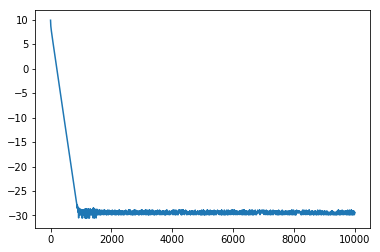

In [7]:
plt.plot(np.log(np.array(res) - 373.4040155581674))
plt.show()